Example of solving Lotka-Volterra equations
===========================================

http://en.wikipedia.org/wiki/Lotka-Volterra_equation   
    
This is basic predator - pray population dynamics (rabbit - fox in our case),   
where pray($x$) has infinite source of food, and predator ($y$) has constant appetite.  

\begin{equation}
\begin{split}
 dx/dt = x ( \alpha - \beta y ) \\
 dy/dt = -y( \gamma - \delta x) \\
\end{split}
\end{equation}   


| Parameter |      Description                    | Value|
|-----------|-------------------------------------|------|
|  $x$      | Pray population - rabbits           | 10   |
|  $y$      | Predator population - foxes         | 28   |
|  $\alpha$ | Pray (rabbit) growth rate           | 1.0  |
|  $\beta$  | Predator effiency (hunting)         | 1.2  |
|  $\gamma$ | Predator (fox) death rate/migration | 4.0  |
|  $\delta$ | Predator (fox) growth rate          | 1.0  |
|  $X_o$    | Pray starting population (rabbits)  | 10   |
|  $Y_o$    | Predator starting population (foxes)| 2    |

---

We'll explore sensitivity of solving equations with:   
1. Euler method
1. Runge-Kutta 4. order method
1. Different time steps


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [20]:
alpha = 1.5
beta  = 1.2
gamma = 4.0
delta = 1.0
x0 = 10     # starting with 10 rabbits
y0 = 2      # and 2 foxes

In [21]:
def lotka_voltarre(x, y):
    x_dot = x*(alpha - beta*y)
    y_dot = -y*(gamma - delta*x)  
    return x_dot, y_dot

In [22]:
dt = 0.1               # Depending on integration we use, for example test with dt = 0.01/0.001 (Euler is not stable)
num_steps = 10000

x = np.empty(num_steps + 1)
y = np.empty(num_steps + 1)
x[0], y[0] = (x0, y0)

In [23]:
# Simple Explicit Euler integration (senitive to time step)
for i in range(num_steps):
    x_dot, y_dot = lotka_voltarre(x[i], y[i])
    x[i + 1] = x[i] + (x_dot * dt)  
    y[i + 1] = y[i] + (y_dot * dt)

<IPython.core.display.Javascript object>


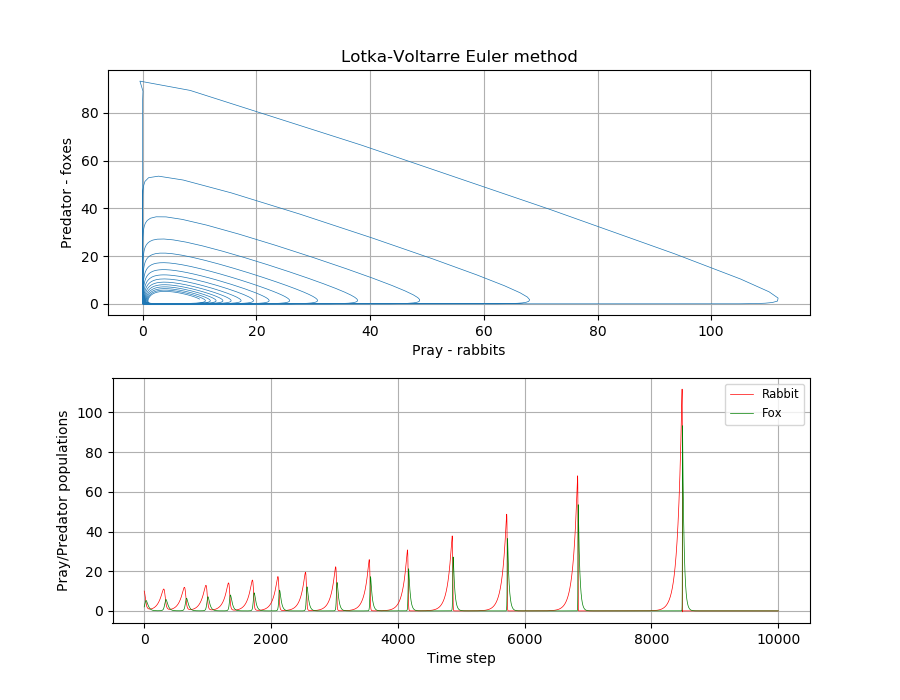

Text(0.5, 0, 'Time step')

In [24]:
fig = plt.figure(figsize = (9, 7))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x, y, lw = 0.5)
ax1.set_xlabel("Pray - rabbits")
ax1.set_ylabel("Predator - foxes")
ax1.set_title("Lotka-Voltarre Euler method")
ax1.set_position([0.12, 0.55, 0.78, 0.35])
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.grid(True)
ax2.plot(range(num_steps+1), x, 'r', linewidth = 0.5, label = 'Rabbit')
ax2.plot(range(num_steps+1), y, 'g', linewidth = 0.5, label = 'Fox')
ax2.legend(loc = 'upper right', fontsize = 'small')
ax2.set_ylabel("Pray/Predator populations")
ax2.set_xlabel("Time step")

In [25]:
x_new = np.empty(num_steps + 1)
y_new = np.empty(num_steps + 1)
x_new[0], y_new[0] = (x0, y0)

In [26]:
# Ruge - Kutta 4. order integration
def RK4(x, y, f, dt):
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    Parameters
    ----------
    x, y : arrays of solutions at the previous time-step.
    f :    function to compute the right hand-side of the system of equation.
    dt :   time-increment.
    
    Returns
    -------
    x1, y1 : arrays of approximate solutions at the next time step.
    """
    # calculate slopes at 4 steps
    k11, k12 = f(x, y)
    u11 = x + (dt/2.)*k11
    u12 = y + (dt/2.)*k12
    k21, k22 = f(u11, u12)
    u21 = x + (dt/2.)*k21
    u22 = y + (dt/2.)*k22
    k31, k32 = f(u21, u22)
    u31 = x + dt*k31
    u32 = y + dt*k32
    k41, k42 = f(u31, u32)
    return x + (dt/6.)*(k11 + 2.*k21 + 2.*k31 + k41), y + (dt/6.)*(k12 + 2.*k22 + 2.*k32 + k42)

In [27]:
# RK4 integration
for i in range(num_steps):
    x_new[i+1], y_new[i+1] = RK4(x_new[i], y_new[i], lotka_voltarre, dt)

<IPython.core.display.Javascript object>


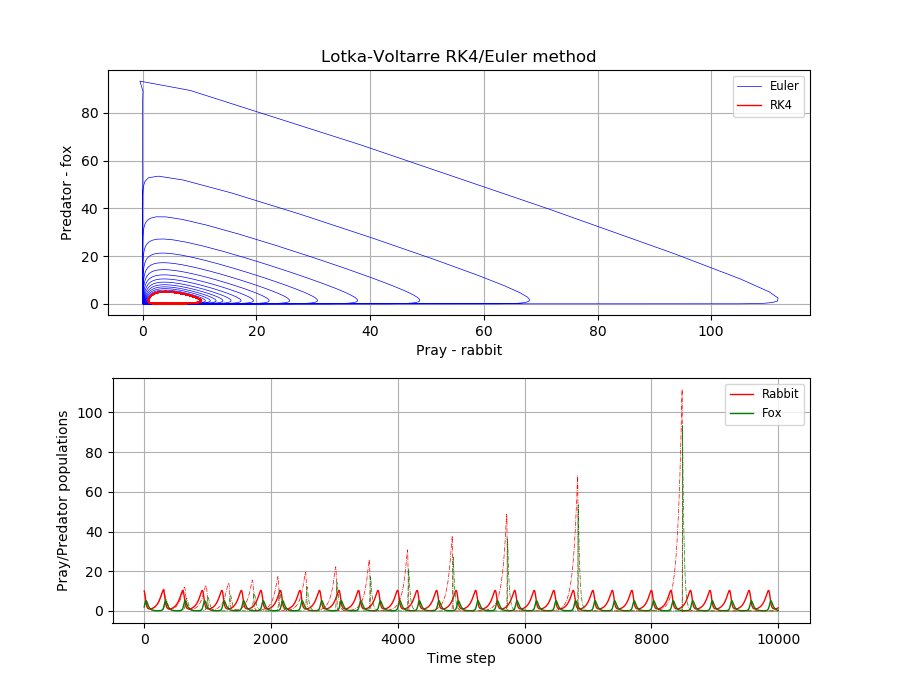

Text(0.5, 0, 'Time step')

In [28]:
##### Fig 1
fig = plt.figure(figsize = (9, 7))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x, y, 'b', lw = 0.5, label = 'Euler')
ax1.plot(x_new, y_new, 'r', lw = 1, label = 'RK4')
ax1.set_xlabel("Pray - rabbit")
ax1.set_ylabel("Predator - fox")
ax1.set_title("Lotka-Voltarre RK4/Euler method")
ax1.grid(True)
ax1.legend(loc = 'upper right', fontsize = 'small')
ax1.set_position([0.12, 0.55, 0.78, 0.35])
##### Fig 2
ax2 = fig.add_subplot(2, 1, 2)
ax2.grid(True)
ax2.plot(range(num_steps+1), x_new, 'r', linewidth = 1, label = 'Rabbit')
ax2.plot(range(num_steps+1), y_new, 'g', linewidth = 1, label = 'Fox')
ax2.plot(range(num_steps+1), x, 'r', linewidth = 0.5, linestyle ='-.')
ax2.plot(range(num_steps+1), y, 'g', linewidth = 0.5, linestyle ='-.')
ax2.legend(loc = 'upper right', fontsize = 'small')
ax2.set_ylabel("Pray/Predator populations")
ax2.set_xlabel("Time step")